---
image: big_data.png
title: Big Data Analysis
subtitle: Data analysis with Pyspark
date: '2024-03-16'
categories: [Big data, Pyspark, Python, matplotlib]
author: Kunal Khurana
jupyter: python3
toc: True
---

# Installation

In [2]:
!pip install pyspark


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488491 sha256=5a72176bdbb100fe9611d828be35fe034a7c320431f0d36ecee1247bc4eb9a7e
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark


## Installing libraries

In [3]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import count, desc, col, max, struct
import matplotlib.pyplot as plt

In [4]:
spark = SparkSession.builder.appName('spark_app').getOrCreate()

In [5]:
traffic_collision_data = '/content/traffic-collision-data-from-2010-to-present.csv'

In [6]:
# prompt: load traffic_collision_data with spark

df = spark.read.csv(traffic_collision_data, header=True, inferSchema=True)


In [7]:
df.show()

+---------+-------------------+--------------------+-------------+-------+-----------+------------------+----------+----------------------+--------------------+----------+----------+--------------+------------+-------------------+--------------------+--------------------+--------------------+---------------+----------------+-------------------+--------------------+-----------------+---------------------------------+
|DR Number|      Date Reported|       Date Occurred|Time Occurred|Area ID|  Area Name|Reporting District|Crime Code|Crime Code Description|            MO Codes|Victim Age|Victim Sex|Victim Descent|Premise Code|Premise Description|             Address|        Cross Street|            Location|      Zip Codes|   Census Tracts|Precinct Boundaries|   LA Specific Plans|Council Districts|Neighborhood Councils (Certified)|
+---------+-------------------+--------------------+-------------+-------+-----------+------------------+----------+----------------------+--------------------+

## Preprocessing

In [8]:
# prompt: drop the DR number column

df = df.drop('DR Number')


In [9]:
df.show()

+-------------------+--------------------+-------------+-------+-----------+------------------+----------+----------------------+--------------------+----------+----------+--------------+------------+-------------------+--------------------+--------------------+--------------------+---------------+----------------+-------------------+--------------------+-----------------+---------------------------------+
|      Date Reported|       Date Occurred|Time Occurred|Area ID|  Area Name|Reporting District|Crime Code|Crime Code Description|            MO Codes|Victim Age|Victim Sex|Victim Descent|Premise Code|Premise Description|             Address|        Cross Street|            Location|      Zip Codes|   Census Tracts|Precinct Boundaries|   LA Specific Plans|Council Districts|Neighborhood Councils (Certified)|
+-------------------+--------------------+-------------+-------+-----------+------------------+----------+----------------------+--------------------+----------+----------+--------

In [10]:
df.summary

<bound method DataFrame.summary of DataFrame[Date Reported: timestamp, Date Occurred: string, Time Occurred: string, Area ID: string, Area Name: string, Reporting District: string, Crime Code: int, Crime Code Description: string, MO Codes: string, Victim Age: string, Victim Sex: string, Victim Descent: string, Premise Code: string, Premise Description: string, Address: string, Cross Street: string, Location: string, Zip Codes: string, Census Tracts: string, Precinct Boundaries: string, LA Specific Plans: string, Council Districts: string, Neighborhood Councils (Certified): string]>

In [13]:
# prompt: print Schema

df.printSchema()


root
 |-- Date Reported: timestamp (nullable = true)
 |-- Date Occurred: string (nullable = true)
 |-- Time Occurred: string (nullable = true)
 |-- Area ID: string (nullable = true)
 |-- Area Name: string (nullable = true)
 |-- Reporting District: string (nullable = true)
 |-- Crime Code: integer (nullable = true)
 |-- Crime Code Description: string (nullable = true)
 |-- MO Codes: string (nullable = true)
 |-- Victim Age: string (nullable = true)
 |-- Victim Sex: string (nullable = true)
 |-- Victim Descent: string (nullable = true)
 |-- Premise Code: string (nullable = true)
 |-- Premise Description: string (nullable = true)
 |-- Address: string (nullable = true)
 |-- Cross Street: string (nullable = true)
 |-- Location: string (nullable = true)
 |-- Zip Codes: string (nullable = true)
 |-- Census Tracts: string (nullable = true)
 |-- Precinct Boundaries: string (nullable = true)
 |-- LA Specific Plans: string (nullable = true)
 |-- Council Districts: string (nullable = true)
 |-- Ne

In [14]:
# prompt: see the shape of a dataframe

print(f"Number of rows: {df.count()}")
print(f"Number of columns: {len(df.columns)}")


Number of rows: 294684
Number of columns: 23


In [15]:
# prompt: select two columns area id and victim age

df.select('Area ID', 'Victim Age').show()


+-------+----------+
|Area ID|Victim Age|
+-------+----------+
|     13|      NULL|
|     20|        40|
|     16|        18|
|     18|        23|
|     16|      NULL|
|     18|        54|
|     04|        33|
|     16|        35|
|     17|        51|
|     17|        23|
|     18|        26|
|     07|        17|
|     05|        44|
|     21|        58|
|     10|        99|
|     21|        22|
|     10|        29|
|     16|        28|
|     02|        38|
|     05|        44|
+-------+----------+
only showing top 20 rows



In [16]:
# prompt: select those records where the victin age  is 17

df.select('Area ID', 'Victim Age').where(df['Victim Age'] == 17).show()


+-------+----------+
|Area ID|Victim Age|
+-------+----------+
|     07|        17|
|     09|        17|
|     09|        17|
|     03|        17|
|     19|        17|
|     20|        17|
|     15|        17|
|     03|        17|
|     17|        17|
|     21|        17|
|     03|        17|
|     17|        17|
|     08|        17|
|     13|        17|
|     21|        17|
|     13|        17|
|     09|        17|
|     07|        17|
|     15|        17|
|     06|        17|
+-------+----------+
only showing top 20 rows



In [18]:

df.select('*').where(df['Victim Age'] == 17).show()

+-------------------+--------------------+-------------+-------+-----------+------------------+----------+----------------------+--------------------+----------+----------+--------------+------------+-------------------+--------------------+--------------------+--------------------+---------------+----------------+-------------------+--------------------+-----------------+---------------------------------+
|      Date Reported|       Date Occurred|Time Occurred|Area ID|  Area Name|Reporting District|Crime Code|Crime Code Description|            MO Codes|Victim Age|Victim Sex|Victim Descent|Premise Code|Premise Description|             Address|        Cross Street|            Location|      Zip Codes|   Census Tracts|Precinct Boundaries|   LA Specific Plans|Council Districts|Neighborhood Councils (Certified)|
+-------------------+--------------------+-------------+-------+-----------+------------------+----------+----------------------+--------------------+----------+----------+--------

In [22]:
# prompt: find out which area is most prone to crimes

most_crime_prone_area = df.groupBy('Area ID').agg(count('*').alias('total_crimes')).orderBy(desc('total_crimes')).first().asDict()['Area ID']
print(f"Most crime prone area: {most_crime_prone_area}")


Most crime prone area: 12


In [24]:
# prompt: find out top 10 crime codes

top_10_crime_codes = df.groupBy('Crime Code Description').agg(count('*').alias('total_crimes')).orderBy(desc('total_crimes')).limit(10).toPandas()['Crime Code Description'].tolist()

print("Top 10 crime codes:")
for code in top_10_crime_codes:
    print(f"\t- {code}")


Top 10 crime codes:
	- TRAFFIC COLLISION
	- 180


In [25]:
# prompt: find out top 10 victim age

top_10_victim_ages = df.groupBy('Victim Age').agg(count('*').alias('total_victims')).orderBy(desc('total_victims')).limit(10).toPandas()['Victim Age'].tolist()

print("Top 10 victim ages:")
for age in top_10_victim_ages:
    print(f"\t- {age}")


Top 10 victim ages:
	- None
	- 30
	- 25
	- 27
	- 24
	- 28
	- 26
	- 23
	- 35
	- 29


## Visualization

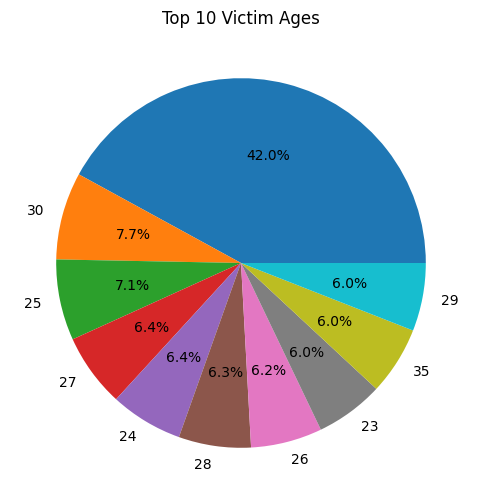

In [29]:
# prompt: visualize the result of top 10 victim age in the form of a pie chart

# Get the top 10 victim ages and their counts
top_10_victim_ages = df.groupBy('Victim Age').agg(count('*').alias('total_victims')).orderBy(desc('total_victims')).limit(10).toPandas()

# Create a pie chart of the top 10 victim ages
plt.figure(figsize=(12, 6))
plt.pie(top_10_victim_ages['total_victims'], labels=top_10_victim_ages['Victim Age'], autopct='%1.1f%%')
plt.title('Top 10 Victim Ages')
plt.show()
